In [5]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/WHR2024.csv')

# Display the first few rows to understand the structure
print(data.head())



  Country name  Ladder score  upperwhisker  lowerwhisker  \
0      Finland         7.741         7.815         7.667   
1      Denmark         7.583         7.665         7.500   
2      Iceland         7.525         7.618         7.433   
3       Sweden         7.344         7.422         7.267   
4       Israel         7.341         7.405         7.277   

   Explained by: Log GDP per capita  Explained by: Social support  \
0                             1.844                         1.572   
1                             1.908                         1.520   
2                             1.881                         1.617   
3                             1.878                         1.501   
4                             1.803                         1.513   

   Explained by: Healthy life expectancy  \
0                                  0.695   
1                                  0.699   
2                                  0.718   
3                                  0.724   
4   

In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Country name                                  0
Ladder score                                  0
upperwhisker                                  0
lowerwhisker                                  0
Explained by: Log GDP per capita              3
Explained by: Social support                  3
Explained by: Healthy life expectancy         3
Explained by: Freedom to make life choices    3
Explained by: Generosity                      3
Explained by: Perceptions of corruption       3
Dystopia + residual                           3
dtype: int64


In [7]:
# Display data types
print("Data types of each column:")
print(data.dtypes)


Data types of each column:
Country name                                   object
Ladder score                                  float64
upperwhisker                                  float64
lowerwhisker                                  float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
Dystopia + residual                           float64
dtype: object


In [8]:
# Summary statistics for numerical columns
print("Summary statistics:")
print(data.describe())


Summary statistics:
       Ladder score  upperwhisker  lowerwhisker  \
count    143.000000    143.000000    143.000000   
mean       5.527580      5.641175      5.413972   
std        1.170717      1.155008      1.187133   
min        1.721000      1.775000      1.667000   
25%        4.726000      4.845500      4.606000   
50%        5.785000      5.895000      5.674000   
75%        6.416000      6.507500      6.319000   
max        7.741000      7.815000      7.667000   

       Explained by: Log GDP per capita  Explained by: Social support  \
count                        140.000000                    140.000000   
mean                           1.378807                      1.134329   
std                            0.425098                      0.333317   
min                            0.000000                      0.000000   
25%                            1.077750                      0.921750   
50%                            1.431500                      1.237500   
75%      

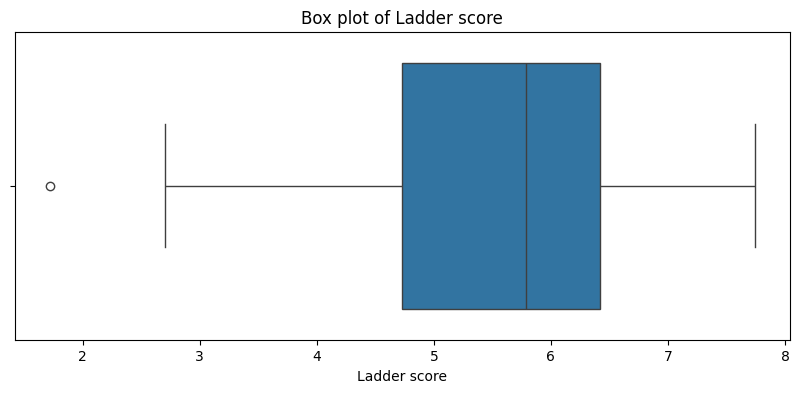

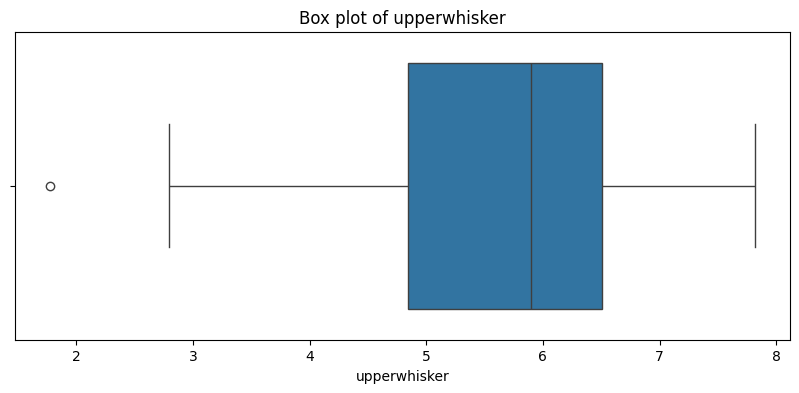

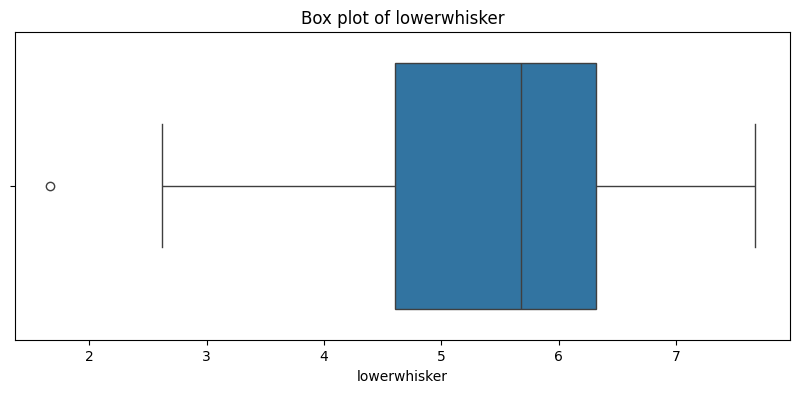

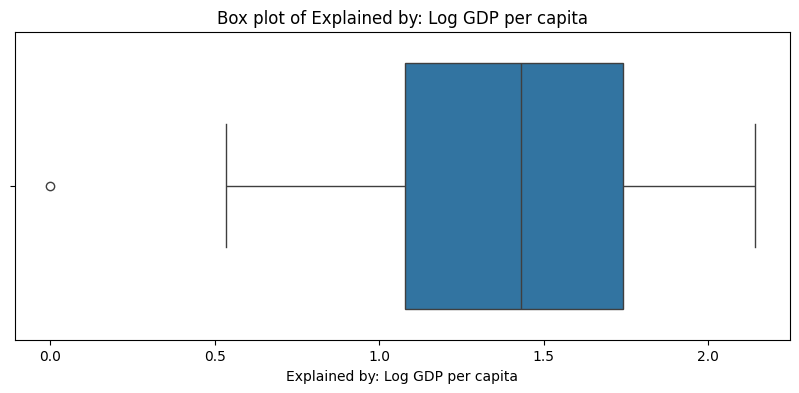

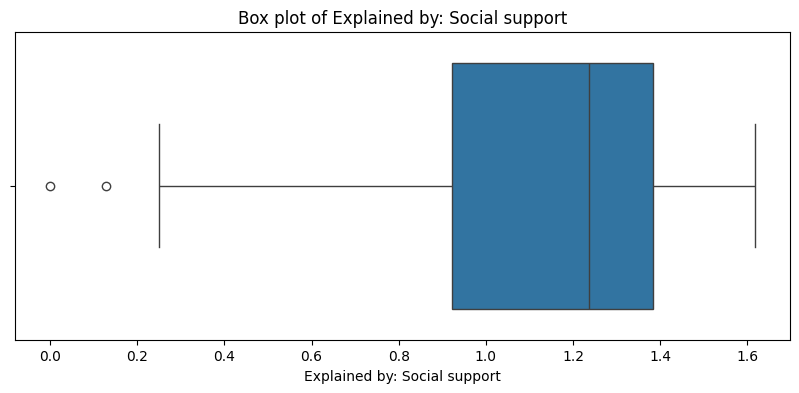

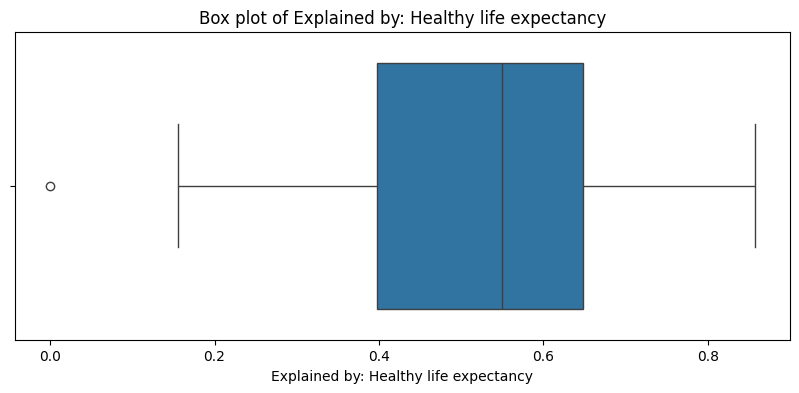

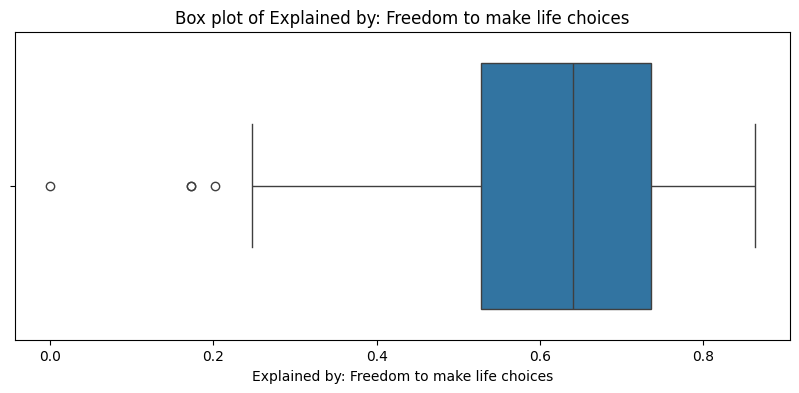

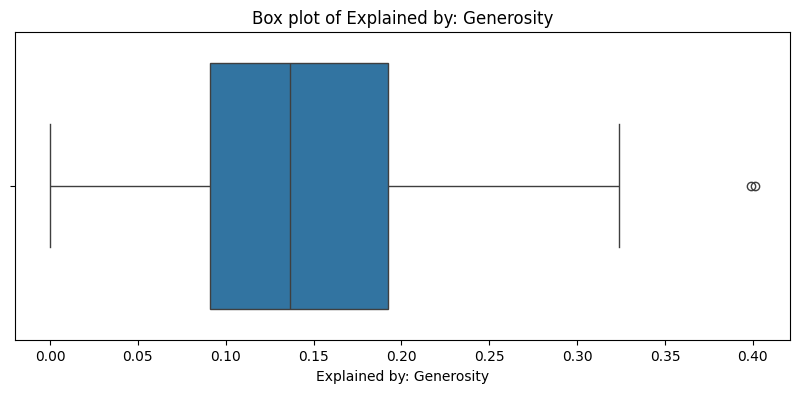

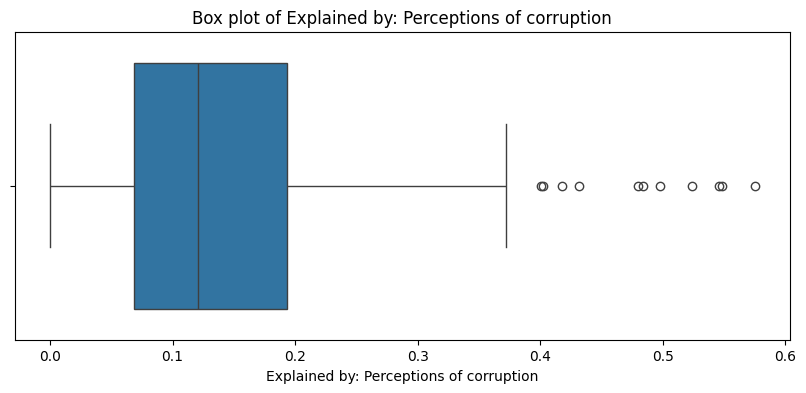

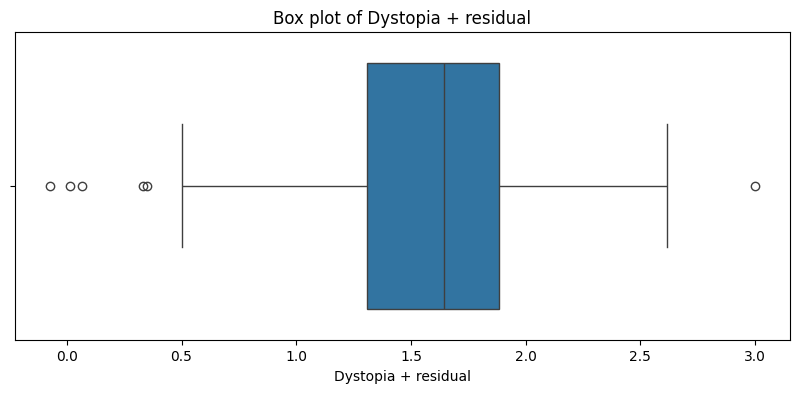

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for each numerical column to identify outliers
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Box plot of {column}')
    plt.show()


In [11]:
# Fill missing values with the mean for only numerical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Alternatively, if you want to drop rows with any missing values (including categorical columns):
data_cleaned = data.dropna()



In [12]:
# Encoding 'Region' if needed for analysis (example using one-hot encoding)
if 'Region' in data.columns:
    data_encoded = pd.get_dummies(data_cleaned, columns=['Region'])
else:
    data_encoded = data_cleaned


In [13]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical columns
scaler = MinMaxScaler()
numeric_columns = data_encoded.select_dtypes(include=['float64', 'int64']).columns
data_encoded[numeric_columns] = scaler.fit_transform(data_encoded[numeric_columns])


In [20]:
# Descriptive statistics
print("Descriptive statistics:")
print(data.describe())



Descriptive statistics:
       Ladder score  upperwhisker  lowerwhisker  \
count    143.000000    143.000000    143.000000   
mean       5.527580      5.641175      5.413972   
std        1.170717      1.155008      1.187133   
min        1.721000      1.775000      1.667000   
25%        4.726000      4.845500      4.606000   
50%        5.785000      5.895000      5.674000   
75%        6.416000      6.507500      6.319000   
max        7.741000      7.815000      7.667000   

       Explained by: Log GDP per capita  Explained by: Social support  \
count                        143.000000                    143.000000   
mean                           1.378807                      1.134329   
std                            0.420584                      0.329777   
min                            0.000000                      0.000000   
25%                            1.079000                      0.924500   
50%                            1.403000                      1.217000   
75%  

In [21]:
# Select only numerical columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numerical columns only
correlations = numeric_data.corr()

# Display the correlation matrix
print("Correlation matrix:")
print(correlations)


Correlation matrix:
                                            Ladder score  upperwhisker  \
Ladder score                                    1.000000      0.999678   
upperwhisker                                    0.999678      1.000000   
lowerwhisker                                    0.999697      0.998750   
Explained by: Log GDP per capita                0.767181      0.760305   
Explained by: Social support                    0.812142      0.809952   
Explained by: Healthy life expectancy           0.758352      0.749563   
Explained by: Freedom to make life choices      0.643342      0.645037   
Explained by: Generosity                        0.129815      0.129347   
Explained by: Perceptions of corruption         0.451052      0.447964   
Dystopia + residual                             0.532624      0.541200   

                                            lowerwhisker  \
Ladder score                                    0.999697   
upperwhisker                                 

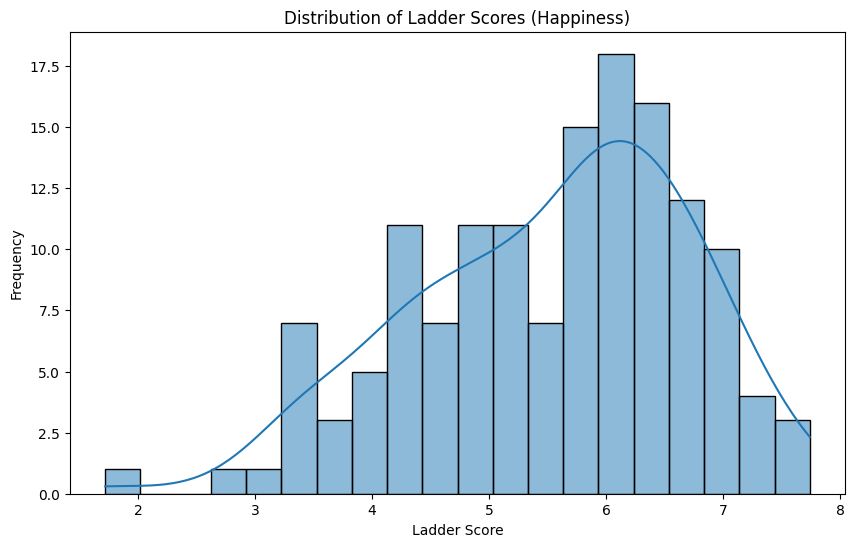

In [22]:
def plot_ladder_score_distribution():
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Ladder score'], bins=20, kde=True)
    plt.title('Distribution of Ladder Scores (Happiness)')
    plt.xlabel('Ladder Score')
    plt.ylabel('Frequency')
    plt.show()

plot_ladder_score_distribution()


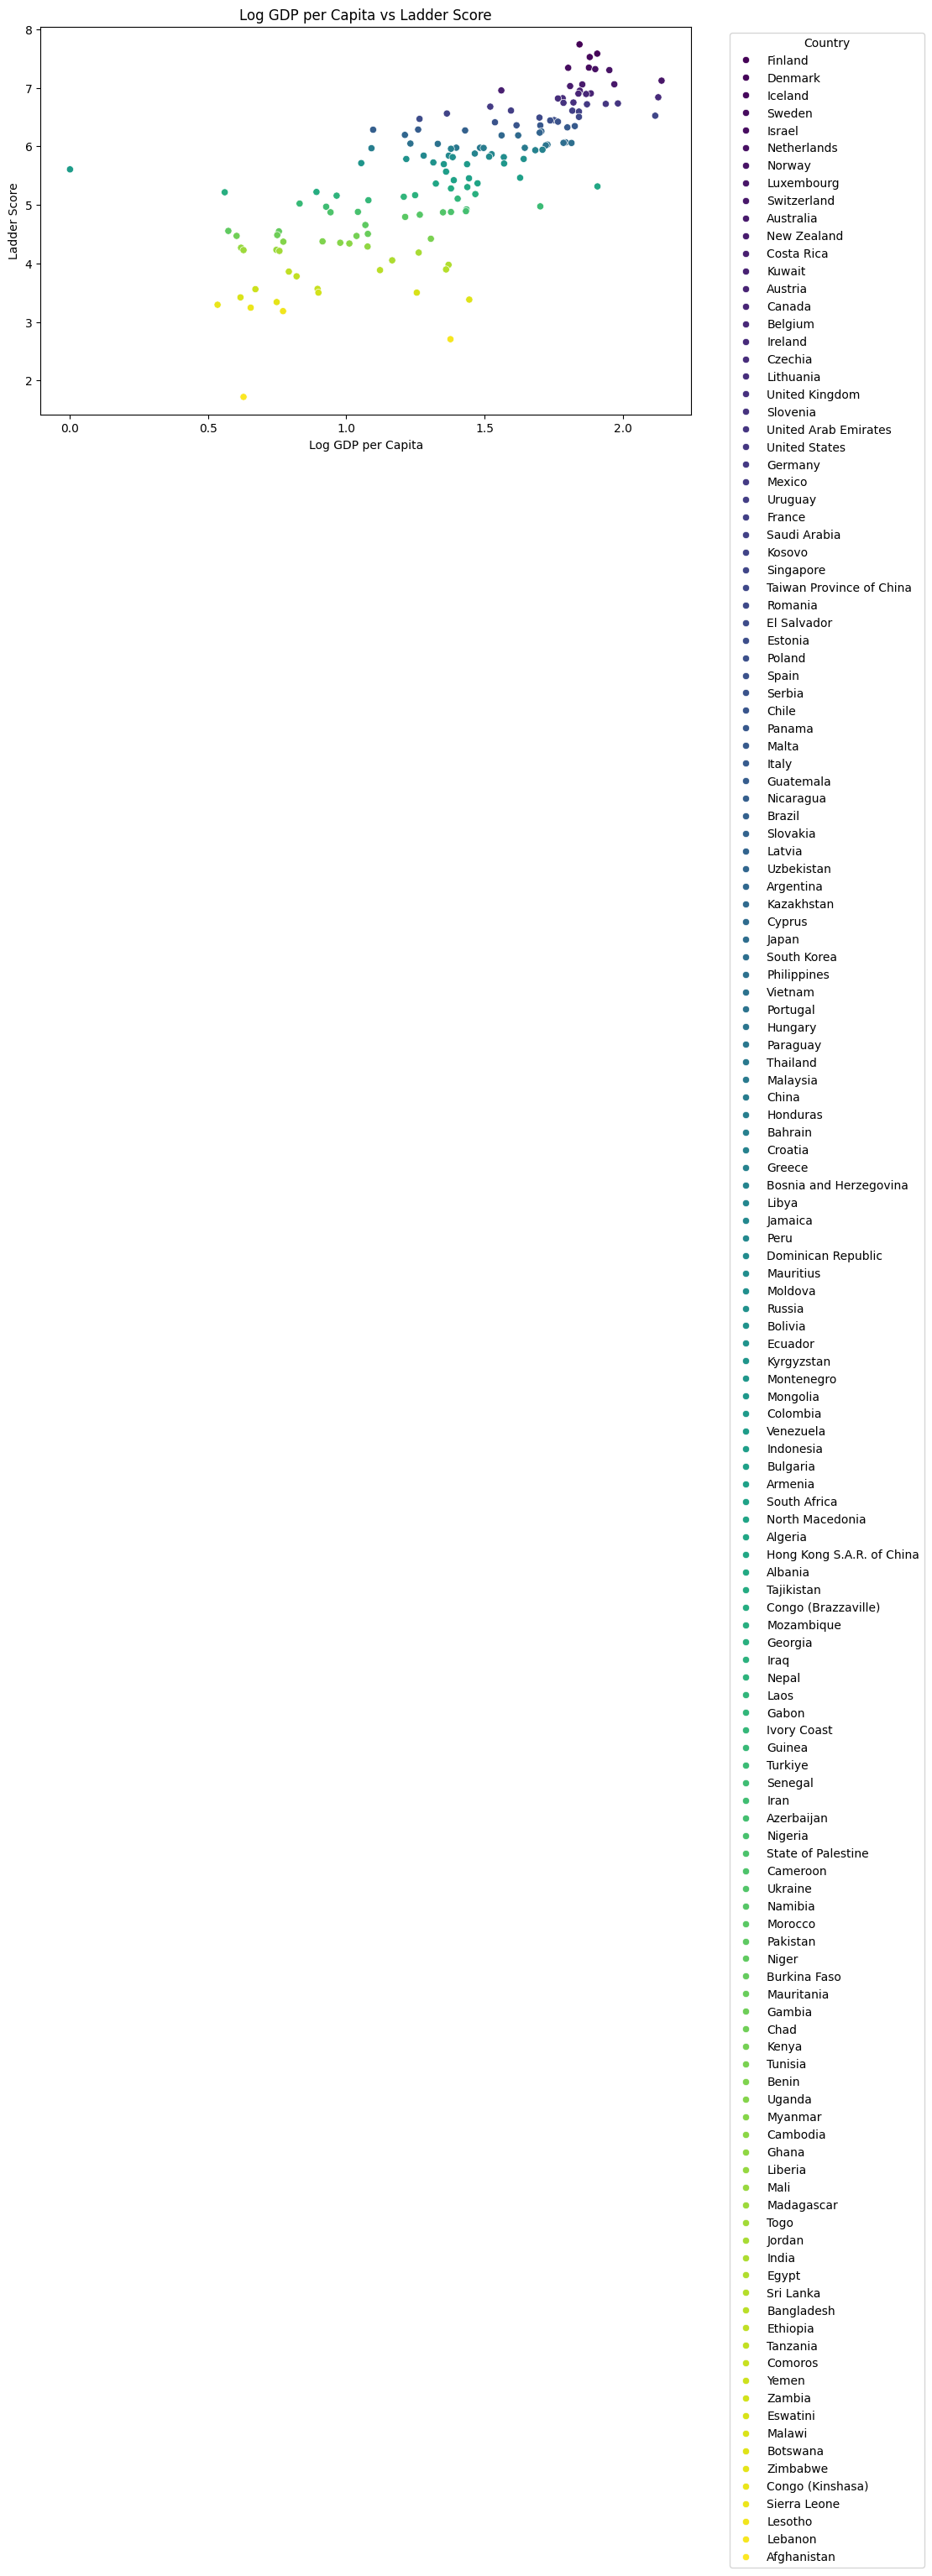

In [23]:
def plot_gdp_vs_ladder_score():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='Explained by: Log GDP per capita', y='Ladder score', hue='Country name', palette='viridis')
    plt.title('Log GDP per Capita vs Ladder Score')
    plt.xlabel('Log GDP per Capita')
    plt.ylabel('Ladder Score')
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

plot_gdp_vs_ladder_score()


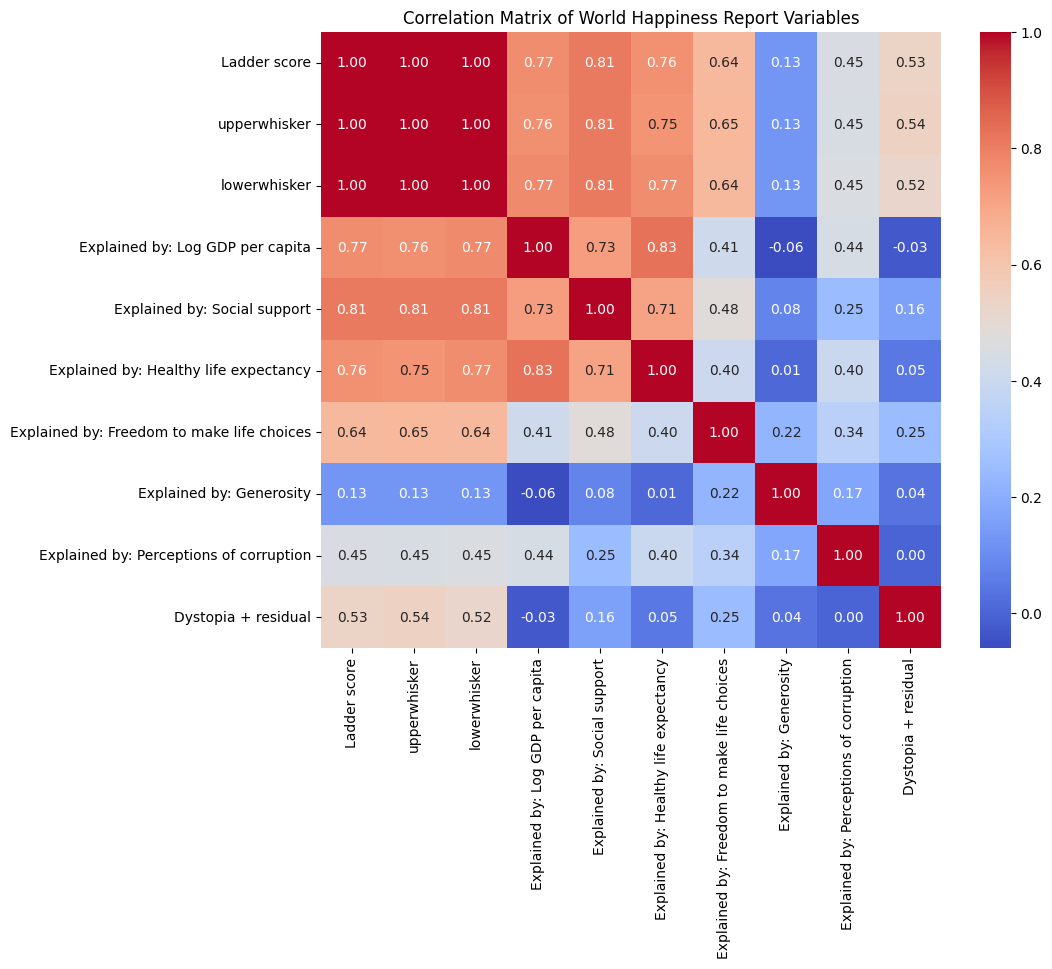

In [24]:
def plot_correlation_heatmap():
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of World Happiness Report Variables')
    plt.show()

plot_correlation_heatmap()
